# Data Input

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy.core.umath_tests import inner1d
from copy import deepcopy
import copy
import math

In [2]:
data = pd.read_csv('secondary_data.csv', sep=";")

In [3]:
cap_shape={"b": "bell", "c": "conical", "x": "convex", "f": "flat", "p": "spherical", "s": "sunken", "o": "others"}
data["cap-shape"]=data["cap-shape"].replace(cap_shape)

cap_surface={"i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth","h": "shiny", "l": "leathery", "k": "silky", "t": "sticky"}
data["cap-surface"]=data["cap-surface"].replace(cap_surface)

cap_color={"n": "brown", "b": "buff", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow", "l": "blue", "f": "none", "o": "orange","k":"black"}
data["cap-color"]=data["cap-color"].replace(cap_color)

bruises={"t":"bruises","f":"no"}
data["does-bruise-or-bleed"]=data["does-bruise-or-bleed"].replace(bruises)

gill_attachment={"a": "adnate", "x": "adnexed", "d": "decurrent", "e": "free", "s": "sinuate", "p": "pores", "f": "none", "?": "unknown"}
data["gill-attachment"]=data["gill-attachment"].replace(gill_attachment)

gill_spacing={"c": "close", "d":"distant", "f": "none"}
data["gill-spacing"]=data["gill-spacing"].replace(gill_spacing)

data["gill-color"]=data["gill-color"].replace(cap_color)

data["stem-color"]=data["stem-color"].replace(cap_color)

veil_type={"p": "partial", "u": "universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)

data["veil-color"]=data["veil-color"].replace(cap_color)

ring_type={"c": "cobwebby", "e": "evanescent", "f": "flaring", "g": "grooved", "l": "large", "p": "pendant", "s": "sheathing", "z": "zone", "y": "scaly", "m": "movable", "f": "none", "?": "unknown"}
data["ring-type"]=data["ring-type"].replace(ring_type)

data["spore-print-color"]=data["spore-print-color"].replace(cap_color)

habitat={"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "h": "heaths", "u": "urban", "w": "waste", "d": "woods"}
data["habitat"]=data["habitat"].replace(habitat)

season={"s": "spring", "u": "summer", "a": "autumn", "w": "winter"}
data["season"]=data["season"].replace(season)

classs={"e":"edible","p":"poisonous"}
data["class"]=data["class"].replace(classs)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
data = data.drop(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1)

In [6]:
data["cap-surface"] = data["cap-surface"].fillna("unknown")
data["gill-attachment"] = data["gill-attachment"].fillna("unknown")
data["ring-type"] = data["ring-type"].fillna("unknown")

In [7]:
data["class"] = data["class"].astype('category')
data["class"] = data["class"].cat.codes

data["cap-shape"] = data["cap-shape"].astype('category')
data["cap-shape"] = data["cap-shape"].cat.codes

data["cap-surface"] = data["cap-surface"].astype('category')
data["cap-surface"] = data["cap-surface"].cat.codes

data["cap-color"] = data["cap-color"].astype('category')
data["cap-color"] = data["cap-color"].cat.codes

data["does-bruise-or-bleed"] = data["does-bruise-or-bleed"].astype('category')
data["does-bruise-or-bleed"] = data["does-bruise-or-bleed"].cat.codes

data["gill-attachment"] = data["gill-attachment"].astype('category')
data["gill-attachment"] = data["gill-attachment"].cat.codes

data["gill-color"] = data["gill-color"].astype('category')
data["gill-color"] = data["gill-color"].cat.codes

data["stem-color"] = data["stem-color"].astype('category')
data["stem-color"] = data["stem-color"].cat.codes

data["has-ring"] = data["has-ring"].astype('category')
data["has-ring"] = data["has-ring"].cat.codes

data["ring-type"] = data["ring-type"].astype('category')
data["ring-type"] = data["ring-type"].cat.codes

data["habitat"] = data["habitat"].astype('category')
data["habitat"] = data["habitat"].cat.codes

data["season"] = data["season"].astype('category')
data["season"] = data["season"].cat.codes

In [8]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,2,3,6,1,3,10,16.95,17.09,11,1,1,7,3
1,1,16.60,2,3,6,1,3,10,17.99,18.19,11,1,1,7,2
2,1,14.07,2,3,6,1,3,10,17.80,17.74,11,1,1,7,3
3,1,14.17,3,6,9,1,3,10,15.77,15.98,11,1,5,7,3
4,1,14.64,2,6,6,1,3,10,16.53,17.20,11,1,5,7,3


# EDA

In [ ]:
def plot_col(col, color= ['red', 'lightblue'], labels = None, hue = None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, palette=color, data=data, ax=ax, hue = hue)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")

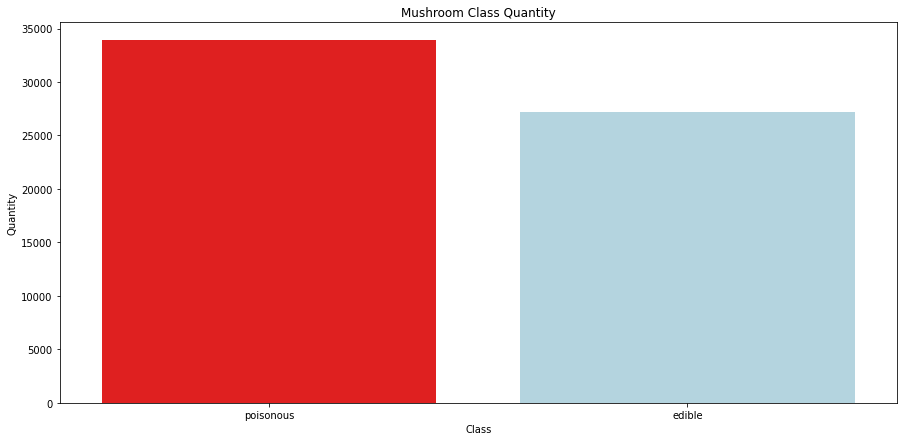

In [ ]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

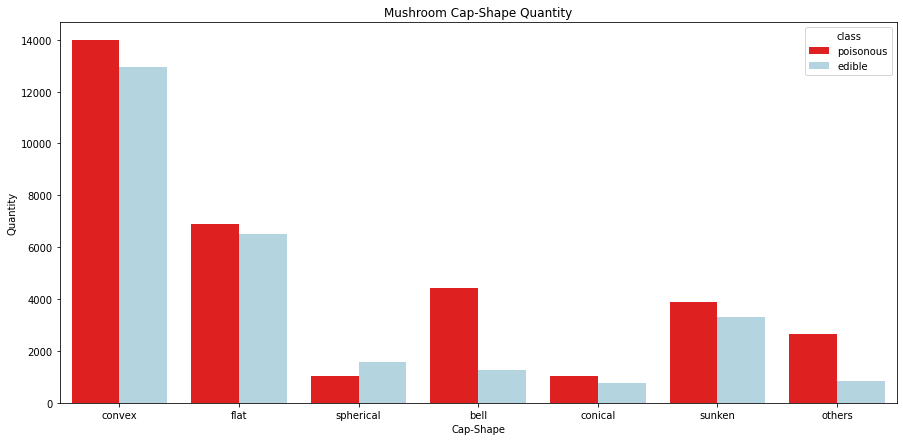

In [ ]:
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=cap_shape)

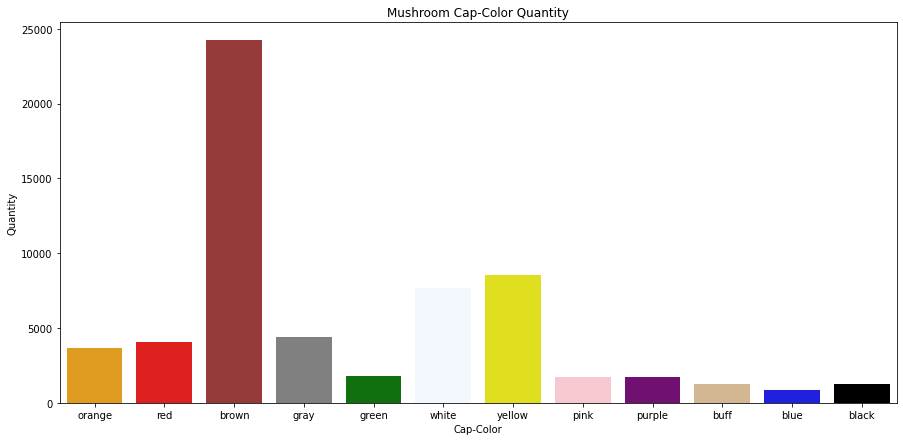

In [ ]:
color_dict = {"orange":"orange", "red":"red", "brown":"brown", "gray":"gray", "green":"green","aliceblue":"white","yellow":"yellow", "pink":"pink", "purple":"purple","burlywood":"buff", "blue":"blue", "black":"black"}

plot_col(col='cap-color', color= color_dict.keys(), labels=cap_color)

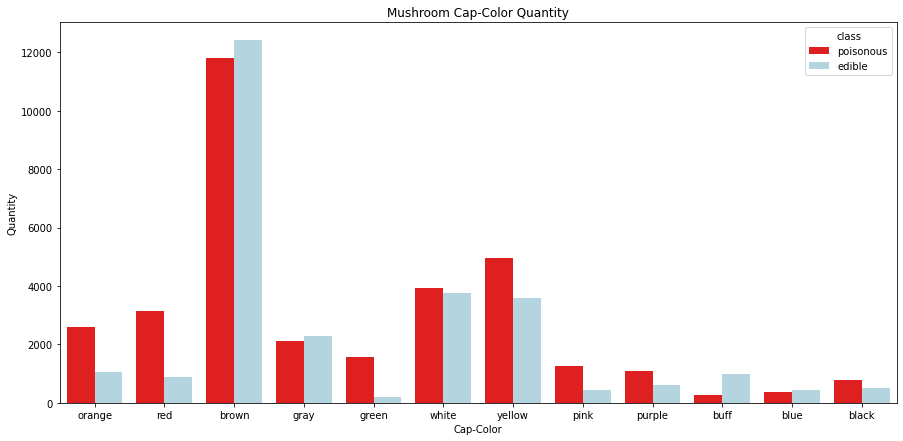

In [ ]:
plot_col(col='cap-color', hue='class', labels=cap_color)

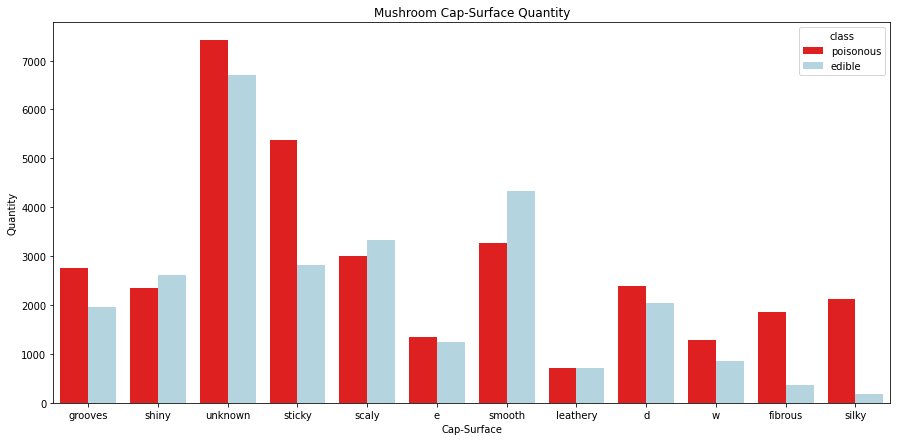

In [ ]:
plot_col(col='cap-surface', hue='class', labels=cap_surface)

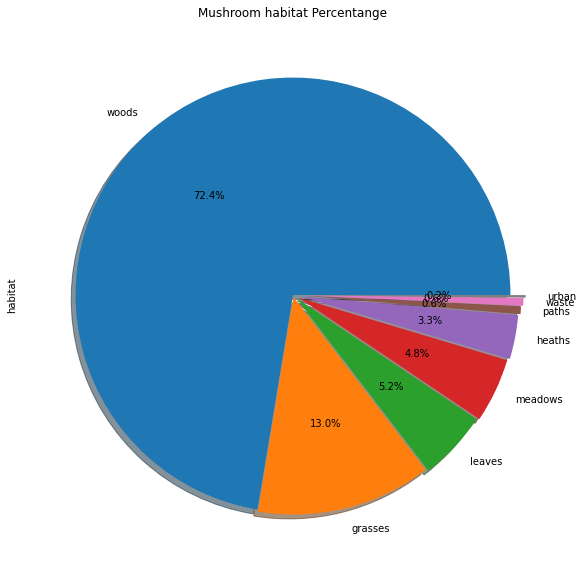

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['habitat'].value_counts().index)

explode = (0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07)
data['habitat'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=order, shadow=True, ax=ax)
ax.set_title('Mushroom habitat Percentange');

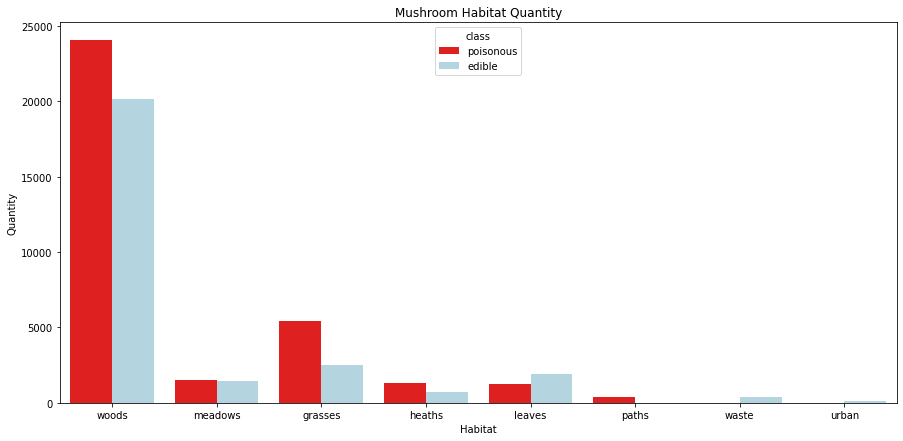

In [ ]:
plot_col(col='habitat', hue='class', labels=cap_surface)

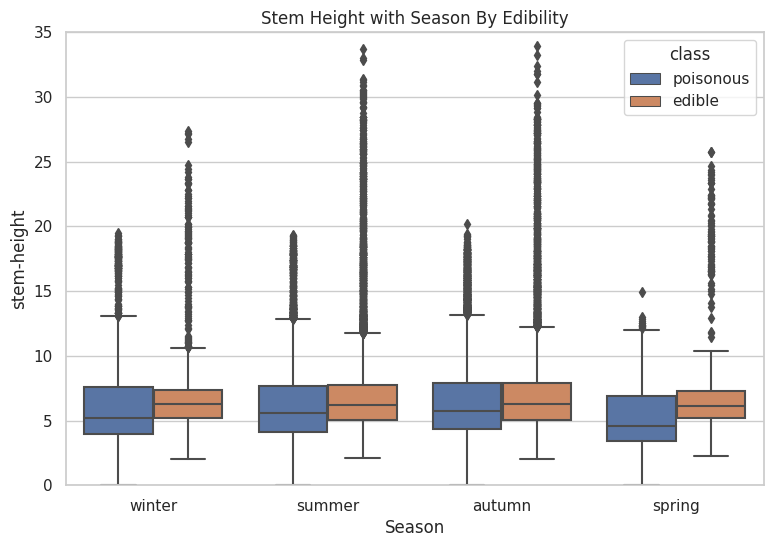

In [ ]:
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'season', y = 'stem-height', hue = 'class')
plt.title('Stem Height with Season By Edibility')
plt.xlabel('Season')
plt.ylim((0,35))
plt.show()

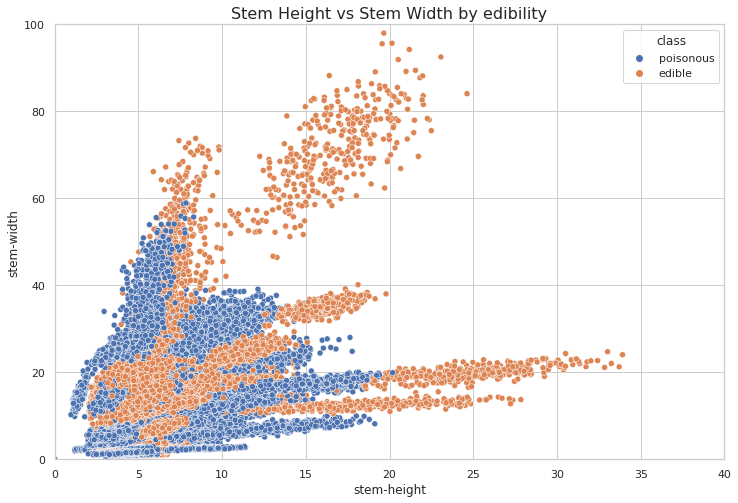

In [ ]:
lead_data = data[['class', 'stem-height', 'stem-width']]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='stem-height',y='stem-width', data=lead_data, hue = 'class')
plt.title("Stem Height vs Stem Width by edibility", fontsize=16)
plt.xlabel('stem-height')
plt.ylabel('stem-width')
plt.xlim(0,40)
plt.ylim(0,100)
plt.show()

# Models

## Logistic Regression

In [ ]:
class LogisticRegression():
    """
    Class for logisttic regression
    """

    def __init__(self, lr=0.001, epochs=1000):
        """
        Logistic Regression Constructor

        Args:
            lr (float, optional): _description_. Defaults to 0.001.
            epochs (int, optional): _description_. Defaults to 1000.
        """
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        
    def loss_function(self,x):
        """
        Sigmoid loss function

        Args:
            x (_type_): Z value(mx+b)

        Returns:
            _type_: Probability
        """
        return 1/(1+np.exp(-x))
    
    def fit(self, X, y):
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Response variable
        """
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.epochs):
            linear_pred = np.dot(X, self.w) + self.b
            pred = self.loss_function(linear_pred)

            dw = (1/n) * np.dot(X.T, (pred - y))
            db = (1/n) * np.sum(pred-y)

            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db

    def predict(self, X):
        """
        Predict the Y

        Args:
            X (_type_): _description_

        Returns:
            _type_: Y-hat probability
        """
        linear_pred = np.dot(X, self.w) + self.b
        y_pred = self.loss_function(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:
data = data.head(10000)

In [ ]:
y = data["class"]
X = data.drop(["class"], axis='columns')
x = X.to_numpy()
y = y.to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2,random_state=42)
lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
lr_pred_train = lr.predict(Xtrain)
lr_pred_test = lr.predict(Xtest)

In [ ]:
print("Accuracy of Logistic Regression on Training Set is ",round(accuracy_score(Ytrain, lr_pred_train), 4))
print("Accuracy of Logistic Regression on Testing Set is ",round(accuracy_score(Ytest, lr_pred_test),4))
conf = confusion_matrix(Ytest, lr_pred_test)
clf_report = classification_report(Ytest, lr_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Logistic Regression on Training Set is  0.6849
Accuracy of Logistic Regression on Testing Set is  0.695
Testing Confusion Matrix : 
[[706 273]
 [337 684]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       979
           1       0.71      0.67      0.69      1021

    accuracy                           0.69      2000
   macro avg       0.70      0.70      0.69      2000
weighted avg       0.70      0.69      0.69      2000



## KNN

In [ ]:
from abc import ABC,abstractmethod
from scipy import stats
from typing import Dict, Any
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    
    def __init__(self, K : int = 1, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    
    def __init__(self, K : int = 1, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """        
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()   
        # return result
        return y_pred

In [ ]:
y = data["class"].values
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2,random_state=42)
knn = KNNClassifier()
knn.fit(Xtrain, Ytrain)
knn_pred_train = knn.predict(Xtrain)
knn_pred_test = knn.predict(Xtest)
print("Accuracy of KNN on Training Set is ",round(accuracy_score(Ytrain, knn_pred_train),4))
print("Accuracy of KNN on Testing Set is ",round(accuracy_score(Ytest, knn_pred_test),4))

Accuracy of KNN on Training Set is  1.0
Accuracy of KNN on Testing Set is  1.0


In [ ]:
print("Accuracy of KNN on Training Set is ",round(accuracy_score(Ytrain, knn_pred_train),4))
print("Accuracy of KNN on Testing Set is ",round(accuracy_score(Ytest, knn_pred_test),4))
conf = confusion_matrix(Ytest, knn_pred_test)
clf_report = classification_report(Ytest, knn_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of KNN on Training Set is  1.0
Accuracy of KNN on Testing Set is  1.0
Testing Confusion Matrix : 
[[ 979    0]
 [   0 1021]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00      1021

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## SVM

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder
def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w
class MulticlassSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose
    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g
    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue
            smallest = min(smallest, g[k])
        return g.max() - smallest
    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]
        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)
        return Ci - self.dual_coef_[:, i] - beta / norms[i]
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)
        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))
        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))
        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)
        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0
            for ii in range(n_samples):
                i = ind[ii]
                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue
                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v
                if v < 1e-12:
                    continue
                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)
                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta
            if it == 0:
                violation_init = violation_sum
            vratio = violation_sum / violation_init
            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))
            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break
        return self
    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [ ]:
y = data["class"].values
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
svm = MulticlassSVM(C=0.1, tol=0.01, max_iter=100, random_state=0, verbose=1)
svm.fit(Xtrain, Ytrain)
svm_pred_train = svm.predict(Xtrain)
svm_pred_test = svm.predict(Xtest)
print("Accuracy of SVM on Training Set is ",round(accuracy_score(Ytrain, svm_pred_train),4))
print("Accuracy of SVM on Testing Set is ",round(accuracy_score(Ytest, svm_pred_test),4))

iter 1 violation 1.0
iter 2 violation 0.9661
iter 3 violation 0.9518
iter 4 violation 0.946
iter 5 violation 0.9431
iter 6 violation 0.941
iter 7 violation 0.9392
iter 8 violation 0.9374
iter 9 violation 0.9368
iter 10 violation 0.9362
iter 11 violation 0.9357
iter 12 violation 0.9356
iter 13 violation 0.9346
iter 14 violation 0.9333
iter 15 violation 0.9324
iter 16 violation 0.9313
iter 17 violation 0.9303
iter 18 violation 0.9288
iter 19 violation 0.9271
iter 20 violation 0.9246
iter 21 violation 0.9223
iter 22 violation 0.9205
iter 23 violation 0.9127
iter 24 violation 0.9065
iter 25 violation 0.899
iter 26 violation 0.8927
iter 27 violation 0.8881
iter 28 violation 0.8805
iter 29 violation 0.8674
iter 30 violation 0.858
iter 31 violation 0.8477
iter 32 violation 0.8381
iter 33 violation 0.8285
iter 34 violation 0.8186
iter 35 violation 0.8036
iter 36 violation 0.7901
iter 37 violation 0.7806
iter 38 violation 0.7676
iter 39 violation 0.7555
iter 40 violation 0.7446
iter 41 violatio

In [ ]:
print("Accuracy of SVM on Training Set is ",round(accuracy_score(Ytrain, svm_pred_train),4))
print("Accuracy of SVM on Testing Set is ",round(accuracy_score(Ytest, svm_pred_test),4))
conf = confusion_matrix(Ytest, svm_pred_test)
clf_report = classification_report(Ytest, svm_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of SVM on Training Set is  0.7181
Accuracy of SVM on Testing Set is  0.718
Testing Confusion Matrix : 
[[622 357]
 [207 814]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       979
           1       0.70      0.80      0.74      1021

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



## Classification Tree

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
        
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print(X.columns[tree.feature_index], "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
tree = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
tree.fit(Xtrain,Ytrain)
tree_pred_train = tree.predict(Xtrain)
tree_pred_test = tree.predict(Xtest)
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree_pred_test),4))

Accuracy of Classification Tree on Training Set is  0.8712
Accuracy of Classification Tree on Testing Set is  0.8655


In [ ]:
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree_pred_test),4))
conf = confusion_matrix(Ytest, tree_pred_test)
clf_report = classification_report(Ytest, tree_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Classification Tree on Training Set is  0.8712
Accuracy of Classification Tree on Testing Set is  0.8655
Testing Confusion Matrix : 
[[926  53]
 [216 805]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       979
           1       0.94      0.79      0.86      1021

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.88      0.87      0.86      2000



In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
tree1 = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
tree1.fit(Xtrain,Ytrain)
tree1_pred_train = tree1.predict(Xtrain)
tree1_pred_test = tree1.predict(Xtest)
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree1_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree1_pred_test),4))

Accuracy of Classification Tree on Training Set is  0.9629
Accuracy of Classification Tree on Testing Set is  0.9595


In [ ]:
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree1_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree1_pred_test),4))
conf = confusion_matrix(Ytest, tree1_pred_test)
clf_report = classification_report(Ytest, tree1_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Classification Tree on Training Set is  0.9629
Accuracy of Classification Tree on Testing Set is  0.9595
Testing Confusion Matrix : 
[[970   9]
 [ 72 949]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       979
           1       0.99      0.93      0.96      1021

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
tree2 = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
tree2.fit(Xtrain,Ytrain)
tree2_pred_train = tree2.predict(Xtrain)
tree2_pred_test = tree2.predict(Xtest)
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree2_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree2_pred_test),4))

Accuracy of Classification Tree on Training Set is  0.9752
Accuracy of Classification Tree on Testing Set is  0.9715


In [ ]:
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree2_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree2_pred_test),4))
conf = confusion_matrix(Ytest, tree2_pred_test)
clf_report = classification_report(Ytest, tree2_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Classification Tree on Training Set is  0.9752
Accuracy of Classification Tree on Testing Set is  0.9715
Testing Confusion Matrix : 
[[975   4]
 [ 53 968]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       979
           1       1.00      0.95      0.97      1021

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
tree3 = DecisionTreeClassifier(min_samples_split=3, max_depth=7)
tree3.fit(Xtrain,Ytrain)
tree3_pred_train = tree3.predict(Xtrain)
tree3_pred_test = tree3.predict(Xtest)
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree3_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree3_pred_test),4))

Accuracy of Classification Tree on Training Set is  0.9855
Accuracy of Classification Tree on Testing Set is  0.984


In [ ]:
print("Accuracy of Classification Tree on Training Set is ",round(accuracy_score(Ytrain, tree3_pred_train),4))
print("Accuracy of Classification Tree on Testing Set is ",round(accuracy_score(Ytest, tree3_pred_test),4))
conf = confusion_matrix(Ytest, tree3_pred_test)
clf_report = classification_report(Ytest, tree3_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Classification Tree on Training Set is  0.9855
Accuracy of Classification Tree on Testing Set is  0.984
Testing Confusion Matrix : 
[[ 960   19]
 [  13 1008]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       979
           1       0.98      0.99      0.98      1021

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



## Random Forest

In [ ]:
from collections import Counter
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common
class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
rf = RandomForest(n_trees=3, min_samples_split=3, max_depth=3)
rf.fit(Xtrain,Ytrain)
rf_pred_train = rf.predict(Xtrain)
rf_pred_test = rf.predict(Xtest)
print("Accuracy of Random Forest on Training Set is ",round(accuracy_score(Ytrain, rf_pred_train),4))
print("Accuracy of Random Forest on Testing Set is ",round(accuracy_score(Ytest, rf_pred_test),4))

Accuracy of Random Forest on Training Set is  0.8712
Accuracy of Random Forest on Testing Set is  0.858


In [ ]:
print("Accuracy of Random Forest on Training Set is ",round(accuracy_score(Ytrain, rf_pred_train),4))
print("Accuracy of Random Forest on Testing Set is ",round(accuracy_score(Ytest, rf_pred_test),4))
conf = confusion_matrix(Ytest, rf_pred_test)
clf_report = classification_report(Ytest, rf_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Random Forest on Training Set is  0.8712
Accuracy of Random Forest on Testing Set is  0.858
Testing Confusion Matrix : 
[[951  28]
 [256 765]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       979
           1       0.96      0.75      0.84      1021

    accuracy                           0.86      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.88      0.86      0.86      2000



In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
rf1 = RandomForest(n_trees=3, min_samples_split=3, max_depth=5)
rf1.fit(Xtrain,Ytrain)
rf1_pred_train = rf1.predict(Xtrain)
rf1_pred_test = rf1.predict(Xtest)
print("Accuracy of Random Forest on Training Set is ",round(accuracy_score(Ytrain, rf1_pred_train),4))
print("Accuracy of Random Forest on Testing Set is ",round(accuracy_score(Ytest, rf1_pred_test),4))

Accuracy of Random Forest on Training Set is  0.9635
Accuracy of Random Forest on Testing Set is  0.9605


In [ ]:
print("Accuracy of Random Forest on Training Set is ",round(accuracy_score(Ytrain, rf1_pred_train),4))
print("Accuracy of Random Forest on Testing Set is ",round(accuracy_score(Ytest, rf1_pred_test),4))
conf = confusion_matrix(Ytest, rf1_pred_test)
clf_report = classification_report(Ytest, rf1_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Random Forest on Training Set is  0.9635
Accuracy of Random Forest on Testing Set is  0.9605
Testing Confusion Matrix : 
[[969  10]
 [ 69 952]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       979
           1       0.99      0.93      0.96      1021

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [ ]:
y = data["class"].values.reshape(-1,1)
X = data.drop(["class"], axis='columns').values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
rf3 = RandomForest(min_samples_split=3, max_depth=7)
rf3.fit(Xtrain,Ytrain)
rf3_pred_train = rf3.predict(Xtrain)
rf3_pred_test = rf3.predict(Xtest)

In [ ]:
print("Accuracy of Random Forest on Training Set is ",round(accuracy_score(Ytrain, rf3_pred_train),4))
print("Accuracy of Random Forest on Testing Set is ",round(accuracy_score(Ytest, rf3_pred_test),4))
conf = confusion_matrix(Ytest, rf3_pred_test)
clf_report = classification_report(Ytest, rf3_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy of Random Forest on Training Set is  1.0
Accuracy of Random Forest on Testing Set is  0.9975
Testing Confusion Matrix : 
[[ 974    5]
 [   0 1021]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       979
           1       1.00      1.00      1.00      1021

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)
    y_pred = model.predict(X_permuted.values)

    permuted_score = accuracy_score(y, y_pred)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """
    y_pred = model.predict(X.values)

    baseline_score_train = accuracy_score(y, y_pred)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance
    
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])


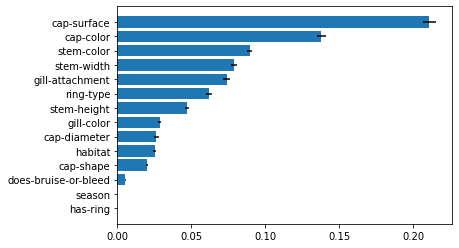

In [ ]:
perm_importance_result_train = permutation_importance(rf2, Xtrain, Ytrain, n_repeats=10)

plot_feature_importances(perm_importance_result_train, Xtrain.columns)

## Neural Network

In [9]:
class DNNClassifier(object):
    '''
    Parameters: layer_dims -- List Dimensions of layers including input and output layer
                hidden_layers -- List of hidden layers
                                 'relu','sigmoid','tanh','softplus','arctan','elu','identity','softmax'
                                 Note: 1. last layer must be softmax 
                                       2. For relu and elu need to mention alpha value as below
                                        ['tanh',('relu',alpha1),('elu',alpha2),('relu',alpha3),'softmax']
                                        need to give a tuple for relu and elu if you want to mention alpha
                                        if not default alpha is 0
                init_type -- init_type -- he_normal  --> N(0,sqrt(2/fanin))
                             he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                             xavier_normal --> N(0,2/(fanin+fanout))
                             xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                                 
                learning_rate -- Learning rate
                optimization_method -- optimization method 'SGD','SGDM','RMSP','ADAM'
                batch_size -- Batch size to update weights 
                max_epoch -- Max epoch number
                             Note : Max_iter  = max_epoch * (size of traing / batch size)
                tolarance -- if abs(previous cost  - current cost ) < tol training will be stopped
                             if None -- No check will be performed
                keep_proba -- probability for dropout
                              if 1 then there is no dropout
                penality -- regularization penality
                            values taken 'l1','l2',None(default)
                lamda -- l1 or l2 regularization value
                beta1 -- SGDM and adam optimization param
                beta2 -- RMSP and adam optimization value
                seed -- Random seed to generate randomness
                verbose -- takes 0  or 1 
    '''
    
    def __init__(self,layer_dims,hidden_layers,init_type='he_normal',learning_rate=0.1,
                 optimization_method = 'SGD',batch_size=64,max_epoch=100,tolarance = 0.00001,
                 keep_proba=1,penality=None,lamda=0,beta1=0.9,
                 beta2=0.999,seed=None,verbose=0):
        self.layer_dims = layer_dims
        self.hidden_layers = hidden_layers
        self.init_type = init_type
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.batch_size = batch_size
        self.keep_proba = keep_proba
        self.penality = penality
        self.lamda = lamda
        self.beta1 = beta1
        self.beta2 = beta2
        self.seed = seed
        self.max_epoch = max_epoch
        self.tol = tolarance
        self.verbose = verbose
    @staticmethod
    def weights_init(layer_dims,init_type='he_normal',seed=None):
        
        """
        Arguments:
            layer_dims -- python array (list) containing the dimensions of each layer in our network
            layer_dims lis is like  [ no of input features,# of neurons in hidden layer-1,..,
                                     # of neurons in hidden layer-n shape,output]
            init_type -- he_normal  --> N(0,sqrt(2/fanin))
                         he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                         xavier_normal --> N(0,2/(fanin+fanout))
                         xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                         seed -- random seed to generate weights
        Returns:
            parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        """
        np.random.seed(seed)
        parameters = {}
        opt_parameters = {}
        L = len(layer_dims)            # number of layers in the network
        if  init_type == 'he_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))  
            
        elif init_type == 'he_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], 1))
            
        elif init_type == 'xavier_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                   (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                      (layer_dims[l], 1)) 
            
        elif init_type == 'xavier_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], 1))
        
        return parameters
    
    @staticmethod
    def sigmoid(X,derivative=False):
        '''Compute Sigmaoid and its derivative'''
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    @staticmethod
    def ReLU(X,alpha=0,derivative=False):
        '''Compute ReLU function and derivative'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*X,X)
        elif derivative == True:
            X_relu = np.ones_like(X,dtype=np.float64)
            X_relu[X < 0] = alpha
            return X_relu
    @staticmethod
    def Tanh(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.tanh(X)
        if derivative == True:
            return 1 - (np.tanh(X))**2
    @staticmethod
    def softplus(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.log(1+np.exp(X))
        if derivative == True:
            return 1 / (1 + np.exp(-np.array(X)))
    @staticmethod
    def arctan(X,derivative=False):
        '''Compute tan^-1(X) and derivative'''
        if derivative == False:
            return  np.arctan(X)
        if derivative == True:
            return 1/ (1 + np.square(X))
    @staticmethod
    def identity(X,derivative=False):
        '''identity function and derivative f(x) = x'''
        X = np.array(X)
        if derivative ==  False:
            return X
        if derivative == True:
            return np.ones_like(X)
    @staticmethod
    def elu(X,alpha=0,derivative=False):
        '''Exponential Linear Unit'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*(np.exp(X)-1),X)
        elif derivative == True:
            return np.where(X<0,alpha*(np.exp(X)),1)
    @staticmethod
    def softmax(X):
        """Compute softmax values for each sets of scores in x."""
        return np.exp(X) / np.sum(np.exp(X),axis=0)
    @staticmethod
    def forward_propagation(X, hidden_layers,parameters,keep_prob=1,seed=None):
    
        """"
        Arguments:
            X -- data, numpy array of shape (input size, number of examples)
            hidden_layers -- List of hideden layers
            weights -- Output of weights_init dict (parameters)
            keep_prob -- probability of keeping a neuron active during drop-out, scalar
        Returns:
            AL -- last post-activation value
            caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
        """
        if seed != None:
            np.random.seed(seed)
        caches = []
        A = X
        L = len(hidden_layers)
        for l,active_function in enumerate(hidden_layers,start=1):
            A_prev = A 
        
            Z = np.dot(parameters['W' + str(l)],A_prev)+parameters['b' + str(l)]
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    A = DNNClassifier.ReLU(Z,active_function[1])
                elif active_function[0] == 'elu':
                    A = DNNClassifier.elu(Z,active_function[1])
            else:
                if active_function == "sigmoid":
                    A = DNNClassifier.sigmoid(Z)
                elif active_function == "identity":
                    A = DNNClassifier.identity(Z)
                elif active_function == "arctan":
                    A = DNNClassifier.arctan(Z)
                elif active_function == "softplus":
                    A = DNNClassifier.softplus(Z)
                elif active_function == "tanh":
                    A = DNNClassifier.Tanh(Z)
                elif active_function == "softmax":
                    A = DNNClassifier.softmax(Z)
                elif  active_function == "relu":
                    A = DNNClassifier.ReLU(Z)
                elif active_function == 'elu':
                    A = DNNClassifier.elu(Z)
            
            if keep_prob != 1 and l != L and l != 1:
                D = np.random.rand(A.shape[0],A.shape[1])
                D = (D<keep_prob)
                A = np.multiply(A,D)
                A = A / keep_prob
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)],D), Z)
                caches.append(cache)
            else:
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)]), Z)
                #print(A.shape)
                caches.append(cache)      
        return A, caches
    @staticmethod
    def compute_cost(A, Y, parameters, lamda=0,penality=None):
        """
        Implement the cost function with L2 regularization. See formula (2) above.
    
        Arguments:
            A -- post-activation, output of forward propagation
            Y -- "true" labels vector, of shape (output size, number of examples)
            parameters -- python dictionary containing parameters of the model
    
        Returns:
            cost - value of the regularized loss function 
        """
        m = Y.shape[1]
    
        cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
    
        L = len(parameters)//2
    
        if penality == 'l2' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.square(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        elif penality == 'l1' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.abs(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        return cost
    @staticmethod
    def back_propagation(AL, Y, caches, hidden_layers, keep_prob=1, penality=None,lamda=0):
        """
        Implement the backward propagation
    
        Arguments:
            AL -- probability vector, output of the forward propagation (L_model_forward())
            Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
            caches -- list of caches containing:
            hidden_layers -- hidden layer names
            keep_prob -- probabaility for dropout
            penality -- regularization penality 'l1' or 'l2' or None
    
        Returns:
             grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
        """
        grads = {}
        L = len(caches) # the number of layers
    
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)
    
        # Initializing the backpropagation
        dZL = AL - Y
    
        cache = caches[L-1]
        linear_cache, activation_cache = cache
        AL, W, b = linear_cache
        grads["dW" + str(L)] = np.dot(dZL,AL.T)/m
        grads["db" + str(L)] = np.sum(dZL,axis=1,keepdims=True)/m
        grads["dA" + str(L-1)] = np.dot(W.T,dZL)
    
    
        # Loop from l=L-2 to l=0
        v_dropout = 0
        for l in reversed(range(L-1)):
            cache = caches[l]
            active_function = hidden_layers[l]
        
            linear_cache, Z = cache
            try:
                A_prev, W, b = linear_cache
            except:
                A_prev, W, b, D = linear_cache
                v_dropout = 1
            
            m = A_prev.shape[1]
        
            if keep_prob != 1 and v_dropout == 1:
                dA_prev = np.multiply(grads["dA" + str(l + 1)],D)
                dA_prev = dA_prev/keep_prob
                v_dropout = 0
            else:
                dA_prev = grads["dA" + str(l + 1)]
                v_dropout = 0
            
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,active_function[1],derivative=True))
                elif active_function[0] == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,active_function[1],derivative=True))
            else:
                if active_function == "sigmoid":
                    dZ = np.multiply(dA_prev,DNNClassifier.sigmoid(Z,derivative=True))
                elif active_function == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,derivative=True))
                elif active_function == "tanh":
                    dZ = np.multiply(dA_prev,DNNClassifier.Tanh(Z,derivative=True))
                elif active_function == "identity":
                    dZ = np.multiply(dA_prev,DNNClassifier.identity(Z,derivative=True))
                elif active_function == "arctan":
                    dZ = np.multiply(dA_prev,DNNClassifier.arctan(Z,derivative=True))
                elif active_function == "softplus":
                    dZ = np.multiply(dA_prev,DNNClassifier.softplus(Z,derivative=True))
                elif active_function == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,derivative=True))
            
            grads["dA" + str(l)] = np.dot(W.T,dZ)
        
            if penality == 'l2':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * W)/m)
            elif penality == 'l1':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * np.sign(W+10**-8))/m)
            else:
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)
            
            grads["db" + str(l + 1)] = np.sum(dZ,axis=1,keepdims=True)/m   
        return grads
    
    @staticmethod
    def update_parameters(parameters, grads,learning_rate,iter_no,method = 'SGD',opt_parameters=None,beta1=0.9,beta2=0.999):
        """
        Update parameters using gradient descent
    
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward
        method -- method for updation of weights
                  'SGD','SGDM','RMSP','ADAM'
        learning rate -- learning rate alpha value
        beta1 -- weighted avg parameter for SGDM and ADAM
        beta2 -- weighted avg parameter for RMSP and ADAM
    
        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
                      opt_parameters
        """
    
        L = len(parameters) // 2 # number of layers in the neural network
        if method == 'SGD':
            for l in range(L):
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]
            opt_parameters = None
        elif method == 'SGDM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*opt_parameters['vdw'+str(l+1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*opt_parameters['vdb'+str(l+1)]
        elif method == 'RMSP':
            for l in range(L):
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                     (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                           (1-beta2)*np.square(grads["dW" + str(l + 1)])
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(grads["dW" + str(l + 1)]/(np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(grads["db" + str(l + 1)]/(np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        elif method == 'ADAM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                                  (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                                   (1-beta2)*np.square(grads["dW" + str(l + 1)])
            
                learning_rate = learning_rate * np.sqrt((1-beta2**iter_no)/((1-beta1**iter_no)+10**-8))
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdw'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdb'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        
        return parameters,opt_parameters
    
    def fit(self,X,y):
        '''
        X -- data, numpy array of shape (input size, number of examples)
        y -- lables, numpy array of shape (no of classes,n)
        
        '''
        
        np.random.seed(self.seed)
        self.grads = {}
        self.costs = []
        M = X.shape[1]
        opt_parameters = {}
        
        if self.verbose == 1:
            print('Initilizing Weights...')
        self.parameters = self.weights_init(self.layer_dims,self.init_type,self.seed)
        self.iter_no = 0
        idx = np.arange(0,M)
        
        if self.optimization_method != 'SGD':
            for l in range(1, len(self.layer_dims)):
                opt_parameters['vdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['vdb' + str(l)] = np.zeros((self.layer_dims[l], 1))
                opt_parameters['sdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['sdb' + str(l)] = np.zeros((self.layer_dims[l], 1)) 
        
        if self.verbose == 1:
            print('Starting Training...')
            
        for epoch_no in range(1,self.max_epoch+1):
            np.random.shuffle(idx)
            X = X[:,idx]
            y = y[:,idx]
            for i in range(0,M, self.batch_size):
                self.iter_no = self.iter_no + 1
                X_batch = X[:,i:i + self.batch_size]
                y_batch = y[:,i:i + self.batch_size]
                # Forward propagation:
                AL, cache = self.forward_propagation(X_batch,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
                #cost
                cost = self.compute_cost(AL, y_batch, self.parameters,self.lamda,self.penality)
                self.costs.append(cost)
                
                if self.tol != None:
                    try:
                        if abs(cost - self.costs[-2]) < self.tol:
                            return self
                    except:
                        pass
                #back prop
                grads = self.back_propagation(AL, y_batch, cache,self.hidden_layers,self.keep_proba,self.penality,self.lamda)
                
                #update params
                self.parameters,opt_parameters = self.update_parameters(self.parameters,grads,self.learning_rate,
                                                                        self.iter_no-1,self.optimization_method,
                                                                        opt_parameters,self.beta1,self.beta2)
                
                if self.verbose == 1:
                    if self.iter_no % 100 == 0:
                        print("Cost after iteration {}: {}".format(self.iter_no, cost))
                
        return self
    def predict(self,X,proba=False):
        '''predicting values
           arguments: X - iput data
                      proba -- False then return value
                               True then return probabaility
        '''
        
        out, _ = self.forward_propagation(X,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
        if proba == True:
            return out.T
        else:
            return np.argmax(out, axis=0)

In [11]:
y = data["class"]
X = data.drop(["class"], axis='columns')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2,random_state=42)
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Xtrain = Xtrain.T
Xtest = Xtest.T
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

Ytrain_trans = lb.fit_transform(Ytrain)
Ytrain_trans = Ytrain_trans.T
y_next = np.where(Ytrain==0,1,0)
Ytrain_trans = list(Ytrain_trans)
Ytrain_trans.append(y_next)
Ytrain_trans = np.array(Ytrain_trans)

Ytest_trans = lb.fit_transform(Ytest)
y_next1 = np.where(Ytest==0,1,0)
Ytest_trans = Ytest_trans.T
Ytest_trans = list(Ytest_trans)
Ytest_trans.append(y_next1)
Ytest_trans = np.array(Ytest_trans)

In [12]:
model1 = DNNClassifier(layer_dims=[Xtrain.shape[0], 200, 2],hidden_layers=['sigmoid','softmax'],
                      optimization_method='SGD',tolarance=None,max_epoch=100,verbose=0,seed=25)
model1.fit(Xtrain,Ytrain_trans)

model1_pred_train = 1 - model1.predict(Xtrain)
model1_pred_test = 1 - model1.predict(Xtest)
print("Accuracy on Training Set is ",round(accuracy_score(Ytrain, model1_pred_train), 4))
print("Accuracy on Testing Set is ",round(accuracy_score(Ytest, model1_pred_test),4))
conf = confusion_matrix(Ytest, model1_pred_test)
clf_report = classification_report(Ytest, model1_pred_test)
print(f"Testing Confusion Matrix : \n{conf}")
print(f"Testing Classification Report : \n{clf_report}")

Accuracy on Training Set is  0.9992
Accuracy on Testing Set is  0.9978
Testing Confusion Matrix : 
[[5368    6]
 [  21 6819]]
Testing Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

